In [3]:
import json
import urllib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev
import pandas as pd
import datetime 

# Washington DC

In [4]:
county='WashDC'
#county='Baltimore_'

In [5]:
# GEt the ID - Name Map from EPA
def getParams():
    params = {}
    url='https://aqs.epa.gov/data/api/list/parametersByClass?email=samavedamanjali@gmail.com&key=russetcrane95&pc=CRITERIA'
    with urllib.request.urlopen(url) as urlhandle:
        params = json.loads(urlhandle.read().decode())

    params_dict = {}
    for i in params['Data']:
        #print (i['code'], i['value_represented'])
        params_dict[i['code']] = i['value_represented']
    del params_dict['14129']  # Some issue with data for this; ignore for now
    del params_dict['81102']
    del params_dict['85129']
    print (params_dict)

{'42101': 'Carbon monoxide', '42401': 'Sulfur dioxide', '42602': 'Nitrogen dioxide (NO2)', '44201': 'Ozone', '88101': 'PM2.5 - Local Conditions'}


In [46]:
# Hard Code params with proper names
# at the
params_dict = {'42101': 'CarbonMonoxide', 
               '42401': 'SulfurDioxide', 
               '42602': 'NitrogenDioxide', 
               '44201': 'Ozone', '88101': 
               'PM2.5LocalConditions'}
params_units = {'42101': 'Parts per million', 
                '42401': 'Parts per billion', 
                '42602': 'Parts per billion', 
                '44201': 'Parts per million', 
                '88101': 'Micrograms/cubic meter (LC)'}

In [45]:
def readAndDisplayFile(c,p,y):
    f_name = '../Anjali/data/'+c+p+'_'+y+'.json'
    #print(f_name)
    with open(f_name) as json_file:
        data = json.load(json_file)
        #print(data)
        df = pd.DataFrame.from_dict(data['Data'])
        #print(df.columns)
        if (df.size != 0) :
            # get only the needed cols out of 30+ columns
            df = df[['date_local','arithmetic_mean','units_of_measure']]

            # agggregate by date so that we have one value per day
            #df = df.groupby('date_local').mean().reset_index()
        return df;

for p in params_dict.keys():
    df = readAndDisplayFile('Baltimore_',p,'2011');
    print(params_dict[p], df.head())

CarbonMonoxide    date_local  arithmetic_mean   units_of_measure
0  2011-12-31         0.341667  Parts per million
1  2011-12-31         0.333333  Parts per million
2  2011-12-30         0.420833  Parts per million
3  2011-12-30         0.416667  Parts per million
4  2011-12-29         0.137500  Parts per million
SulfurDioxide    date_local  arithmetic_mean   units_of_measure
0  2011-12-31         1.201408  Parts per billion
1  2011-12-30         1.704930  Parts per billion
2  2011-12-29         1.289568  Parts per billion
3  2011-12-28         0.321831  Parts per billion
4  2011-12-27         0.877465  Parts per billion
NitrogenDioxide    date_local  arithmetic_mean   units_of_measure
0  2011-12-31        17.083333  Parts per billion
1  2011-12-31        17.083333  Parts per billion
2  2011-12-30        20.875000  Parts per billion
3  2011-12-30        20.875000  Parts per billion
4  2011-12-29        21.208333  Parts per billion
Ozone    date_local  arithmetic_mean   units_of_measure

In [11]:
def readAndDisplayFileYearRange(c,px,ya,yb):
    #print(c,px,ya,yb)
    # Create Empty DF
    df_ab = pd.DataFrame()
    for y in range(ya,yb):
        df1 = readAndDisplayFile(c,px,str(y));
        df_ab = df_ab.append(df1,ignore_index=True)
    return df_abs
    
#df = readAndDisplayFile('Baltimore','p','2011');

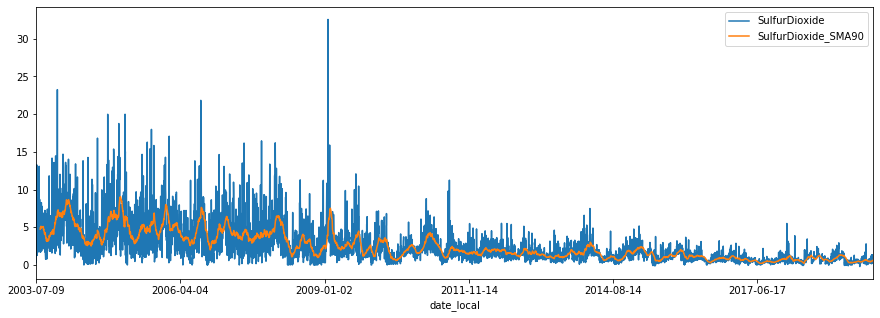

In [33]:
p='42401'
pn=params_dict[p]
df = readAndDisplayFileYearRange(county,p,2001,2020)  
df.columns = ['date_local', pn]
# Add a col for Moving average
df[pn+'_SMA90'] = df.iloc[:,1].rolling(window=30).mean()
df.groupby('date_local').mean().plot(figsize=(15,5))

In [31]:
df

,date_local,SulfurDioxide,SulfurDioxide_SMA90
0,2003-07-09,0.322222,NaN
1,2003-07-10,1.610715,NaN
2,2003-07-11,1.545238,1.159392
3,2003-07-12,2.255124,1.803692
4,2003-07-13,3.212267,2.337543
...,...,...,...
5797,2019-09-26,1.327431,0.863455
5798,2019-09-27,0.373826,0.830474
5799,2019-09-28,0.484167,0.728474
5800,2019-09-29,0.210486,0.356160


42101 CarbonMonoxide
42401 SulfurDioxide
42602 NitrogenDioxide
44201 Ozone
88101 PM2.5LocalConditions


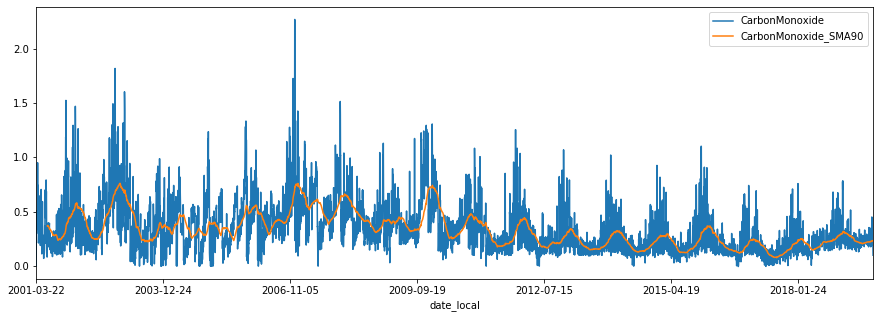

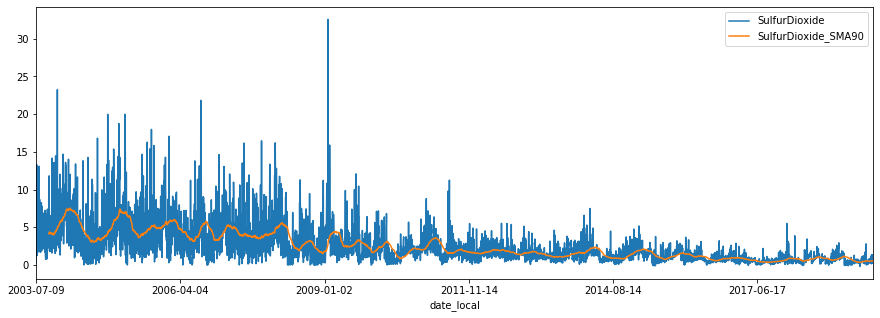

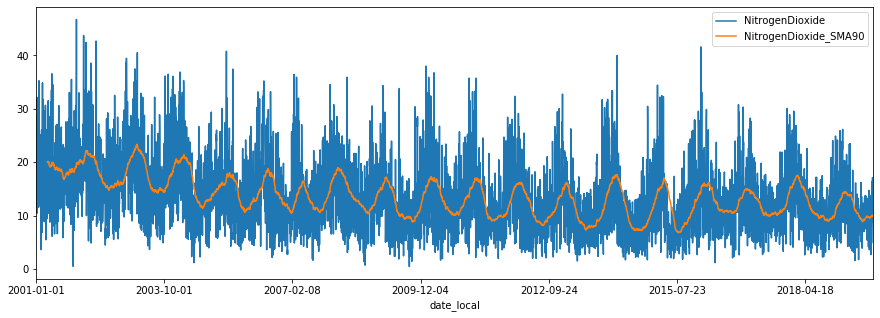

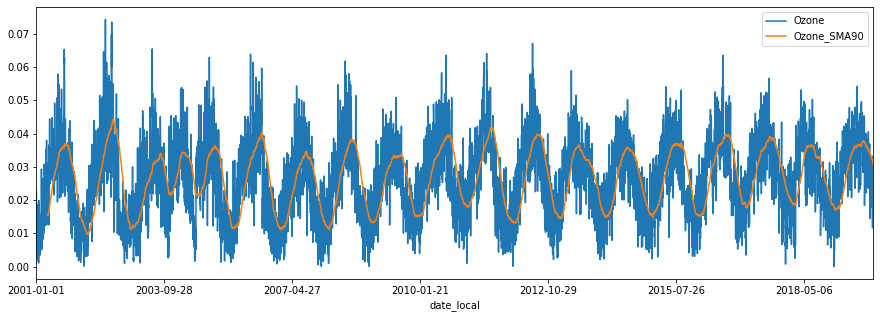

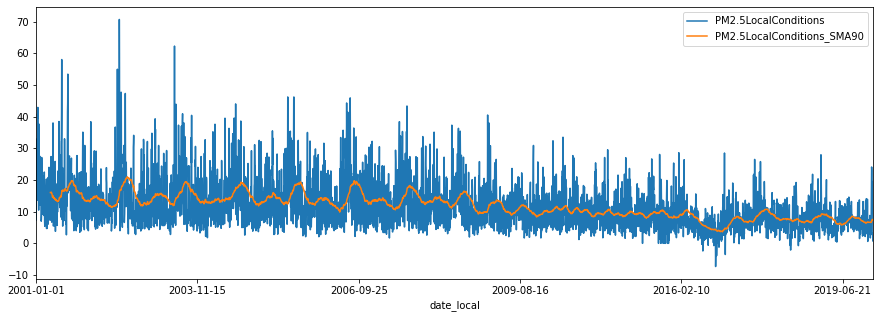

In [7]:
# For each Pollutent, read the data into DFs
for p in params_dict.keys():
    print(p, params_dict[p])
    pn=params_dict[p]

    df = readAndDisplayFileYearRange(county,p,2001,2020)    
    df.columns = ['date_local', params_dict[p]]
    df[pn+'_SMA90'] = df.iloc[:,1].rolling(window=90).mean()
    df.groupby('date_local').mean().plot(figsize=(15,5))



In [8]:
def dayofyear():
    x = datetime.date(2019, 4, 13)
    y = datetime.date(2019,4,14)
    one_day = y-x
    num_days = datetime.date(2011, 12, 31) - datetime.date(2010, 1, 1)
    begin = datetime.date(2010, 1, 1)
    end = datetime.date(2011, 12, 31)
    for d in range(0, num_days.days):
        newDate = (str(begin + (d*one_day)))
        print(newDate)
    return newDate

#dayofyear()

In [9]:
df_master = {}

for p in params_dict.keys():
    print(p, params_dict[p])
    df = readAndDisplayFileYearRange(county,p,2010,2020)    
    #df.columns = ['date_local', params_dict[p]]
    df_master[p] = df;   


42101 CarbonMonoxide
42401 SulfurDioxide
42602 NitrogenDioxide
44201 Ozone
88101 PM2.5LocalConditions


##  90 Day Moving Averages

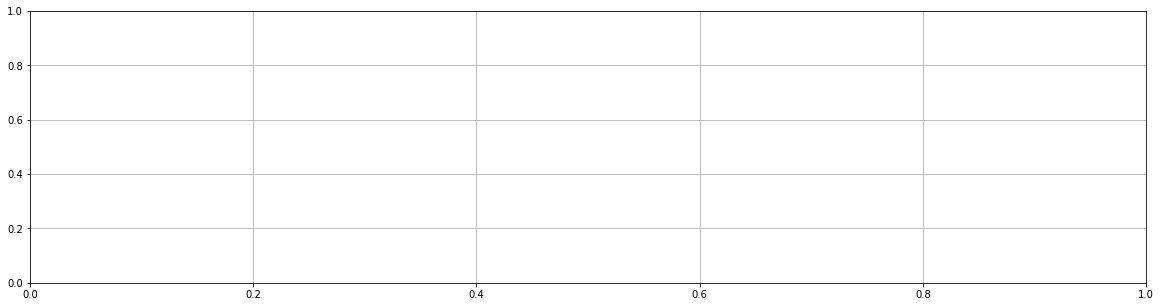

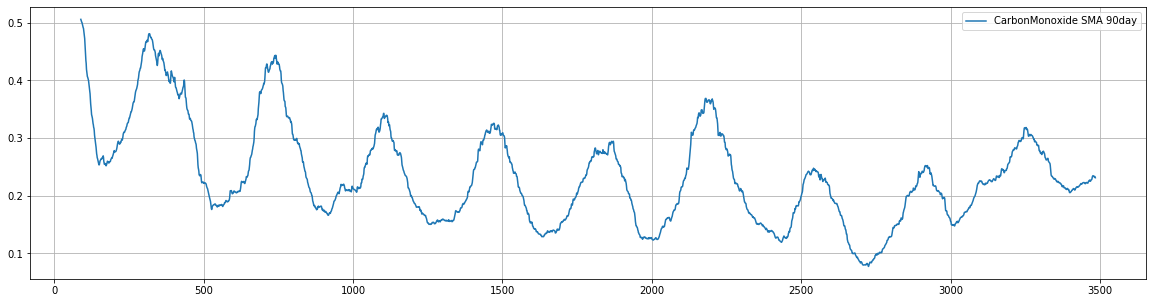

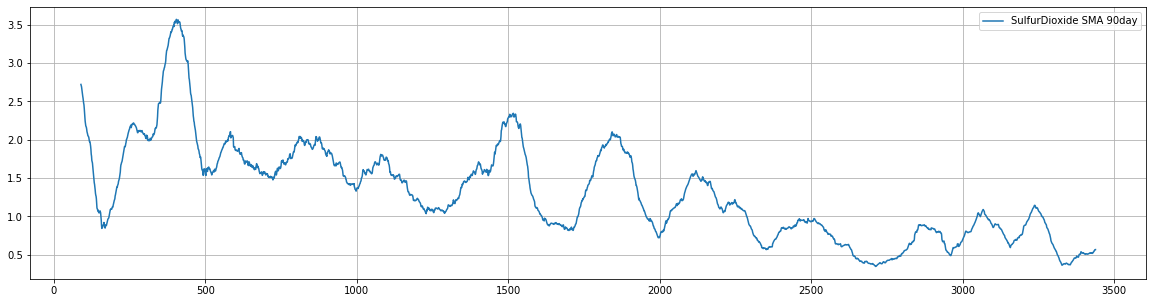

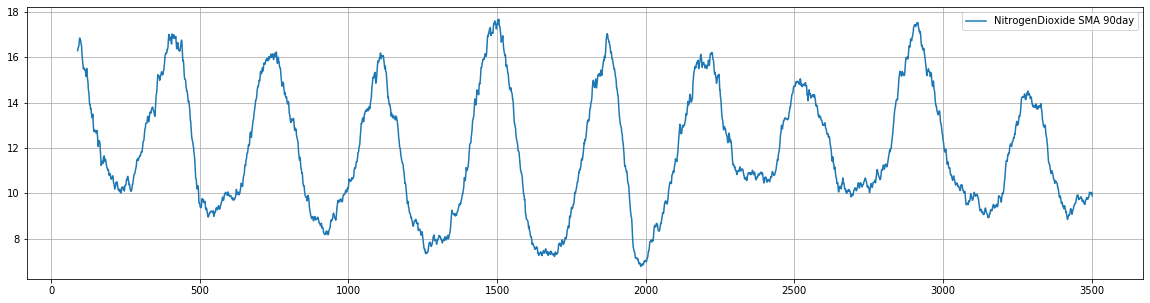

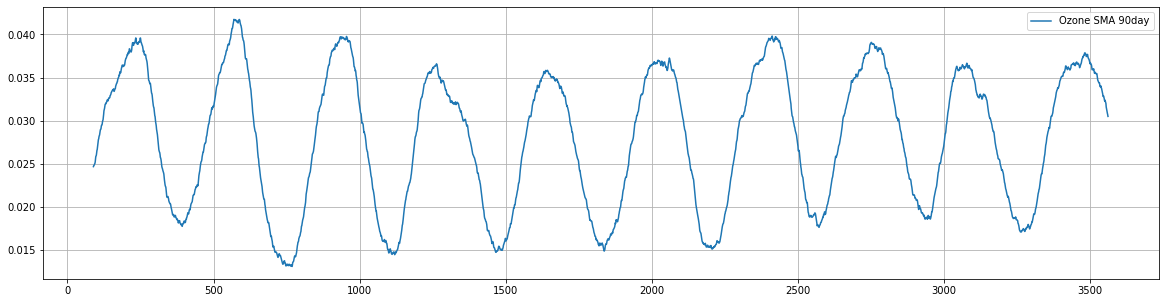

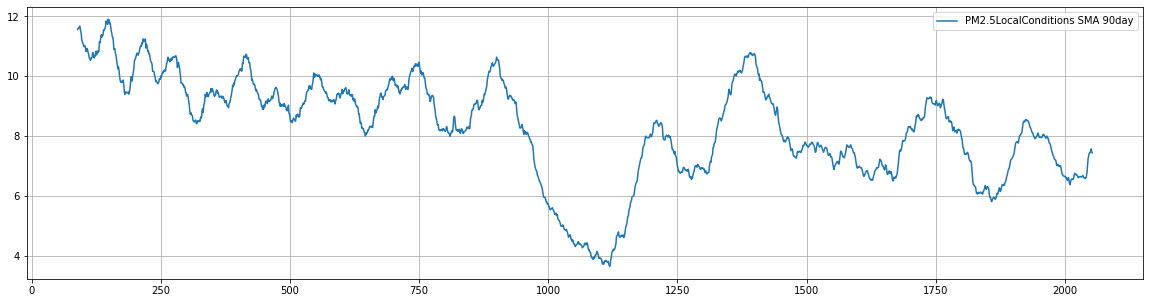

In [10]:
plt.figure(figsize=[20,5])
plt.grid(True)
for p in params_dict.keys():
    pn=params_dict[p]
    dfx = df_master[p]
    #dfx.set_index('date_local',drop=True,inplace=True)
    dfx[pn+'_SMA90'] = dfx.iloc[:,1].rolling(window=90).mean()
    plt.figure(figsize=[20,5])
    plt.grid(True)
    plt.plot( dfx[pn+'_SMA90'],label=pn+' SMA 90day')
    plt.legend(loc='best')

In [11]:
def combineParamCols(ya,yb):
    x = datetime.date(2019, 1, 1)
    y = datetime.date(2019,1,2)
    one_day = y-x

    begin = datetime.date(ya, 1, 1)
    end = datetime.date(yb, 12, 31)
    num_days = end - begin
    print(begin, end)
    data_master = {}
    data_master['date_local'] = []
    for p in params_dict.keys():
        data_master[p] = []

    df_new = pd.DataFrame(data_master)            

    for d in range(0, num_days.days):
        new_date = str(begin + (d*one_day))
        data_master['date_local'].append(new_date)
        for p in params_dict.keys():
            df = df_master[p]
            try:
                val = df[df.date_local==new_date]['arithmetic_mean'].values[0]
                #print(new_date,p, val)
                data_master[p].append(val)
                #print (data_master[p])
            except:
                data_master[p].append(0) #### TBD to think about missing data later 

    return pd.DataFrame(data_master)           


In [12]:
y=2011
df_comb = combineParamCols(y,y)
corrmat = df_comb.corr()
yrly_corrs = {}    
for y in range(2010, 2020):
    df_comb = combineParamCols(y,y)
    yrly_corrs[y] = df_comb.corr()
    


2011-01-01 2011-12-31
2010-01-01 2010-12-31
2011-01-01 2011-12-31
2012-01-01 2012-12-31
2013-01-01 2013-12-31
2014-01-01 2014-12-31
2015-01-01 2015-12-31
2016-01-01 2016-12-31
2017-01-01 2017-12-31
2018-01-01 2018-12-31
2019-01-01 2019-12-31


## Simple pair plots among all pollutents

2015-01-01 2015-12-31


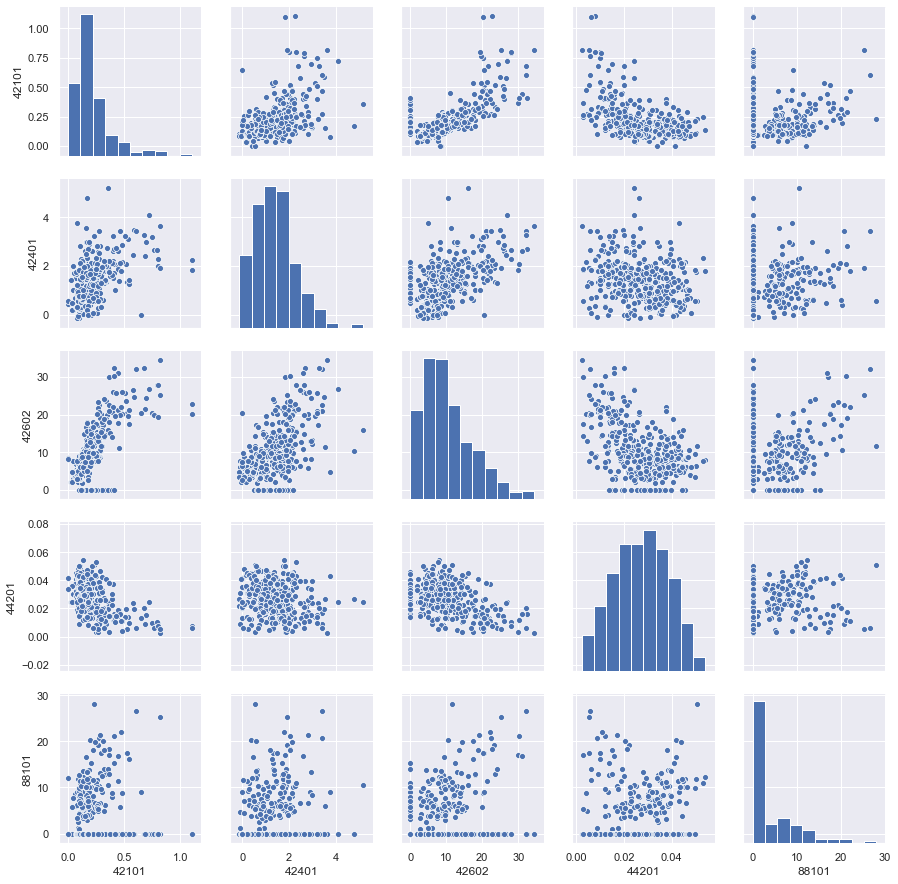

In [13]:
df_comb = combineParamCols(2015,2015)
sns.set()
cols = params_dict.keys()
sns.pairplot(df_comb[cols], height=2.5)
#plt.show()

## Yearly Correlation between pollutents 

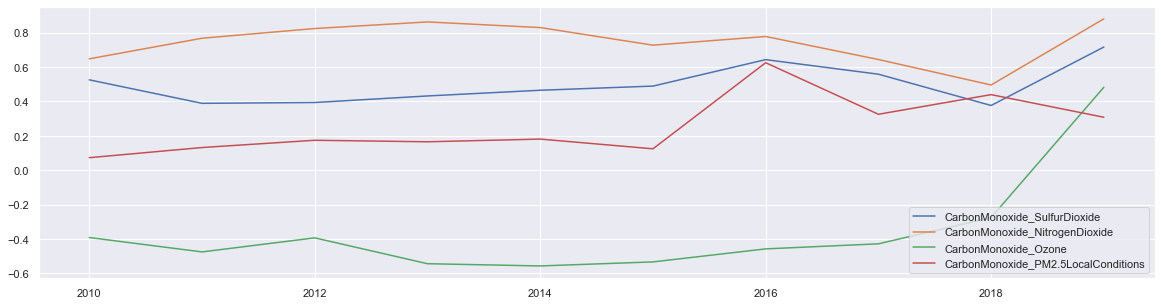

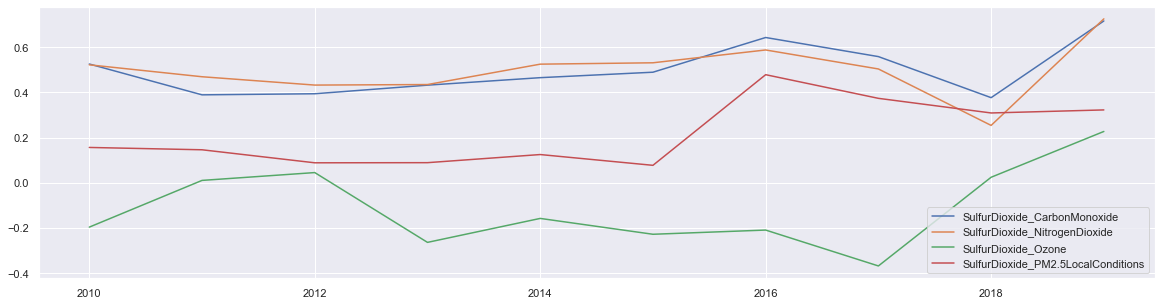

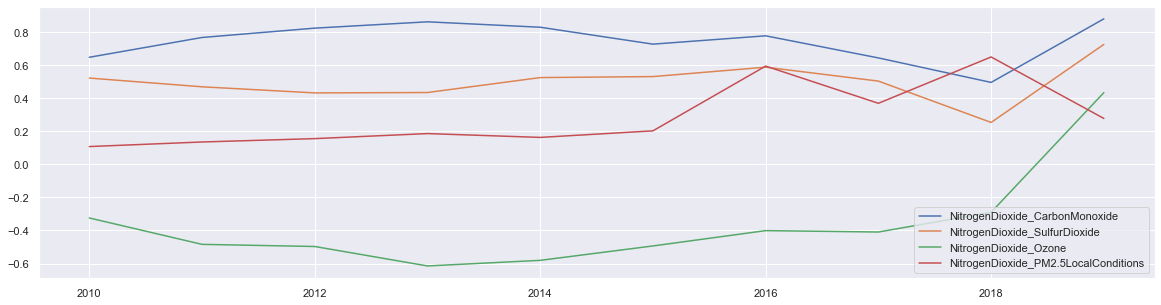

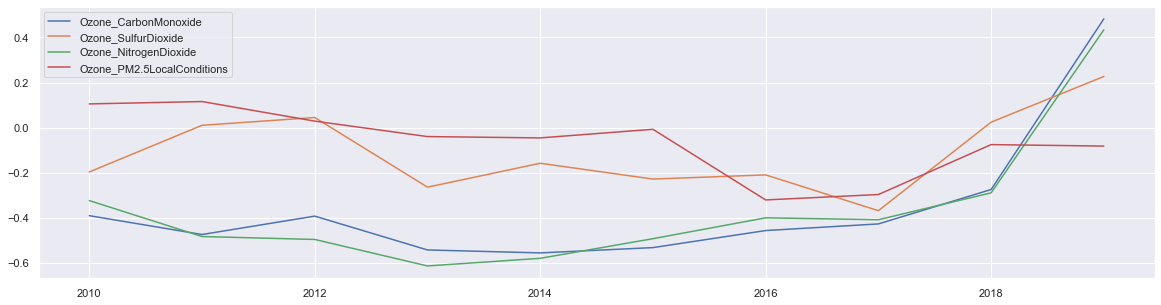

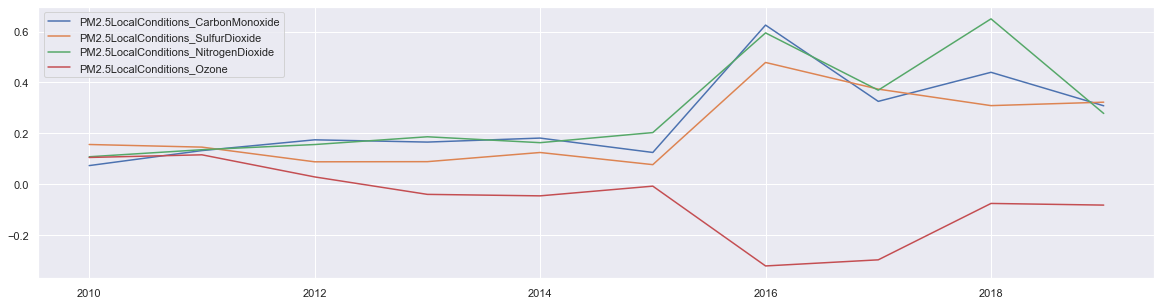

In [14]:
corr_dict = {}
x_ax = []
for y in range(2010, 2020):
    x_ax.append(y)


for pa in params_dict.keys():
    per_par_dict = {}
    corr_dict[pa]=per_par_dict
    plt.figure(figsize=(20,5)) #  width, height

    for pb in params_dict.keys():
        if pa == pb:
            continue
        per_par_dict[pb] = []
        for y in range(2010, 2020):
            per_par_dict[pb].append(yrly_corrs[y][pa][pb])
        lbl = params_dict[pa]+'_'+params_dict[pb]
        plt.plot(x_ax,per_par_dict[pb],label=lbl)
    plt.legend(loc='best')
    plt.show()

#corr_dict

## GEV PDF - work in progress

(-0.5112526217910922, 2.844272843424296, 1.0813536634426404)
(-0.4782309664121023, 2.382512431418828, 0.7866886978819627)
(-0.03560758956759908, 9.081264487424363, 4.593410317479557)


C:\Users\ksama_3n8exwu\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2402: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


(1.52856318215746, 0.0273657952731248, 0.06079318139634372)
(0.044954139716238864, 6.227586471477782, 3.9675846283494494)


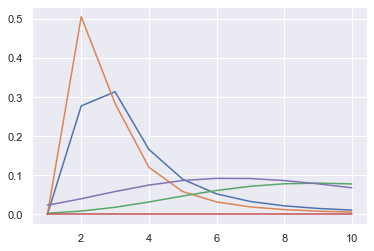

In [18]:
for p in params_dict.keys():
    df_10 = readAndDisplayFileYearRange(county,p,2010,2020)
    dataN = df_10['arithmetic_mean'].tolist()
    t = np.linspace(1,10,10)
    fit = gev.fit(dataN,loc=3)
    pdf = gev.pdf(t, *fit)
    plt.plot(t, pdf)
    #plt.plot(t, dataN, "o")
    print(fit)
